# Decision Tree Classification

<li>Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

<li>In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

<li>The decisions or the test are performed on the basis of features of the given dataset.

<li>A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

<img src = "DT.jpg" style = "width 230 px; height 125 px"/>

<h2>Importing the libraries 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
#splitting data
from sklearn.model_selection import train_test_split
#Standard Scaler
from sklearn.preprocessing import StandardScaler
#Decision tree
from sklearn.tree import DecisionTreeClassifier
#Confusion Metrix
from sklearn.metrics import confusion_matrix ,accuracy_score
#grid search
from sklearn.model_selection import GridSearchCV

<h2>Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values #user id did not implement any thing
y = dataset.iloc[:, 4].values
print(X.shape, y.shape)

(400, 2) (400,)


<h2>Splitting the dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<h2>Feature Scaling

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #we alredy fit the model
X_test = sc.transform(X_test)       #so only TRANSFORM

<h2>Fitting Decision Tree Classification to the Training set

In [8]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<h2>Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)

<h2>Making the Confusion Matrix

<img src = "CM.png" style = "width 50 px; height 30 px"/>

In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

91 out of 100 are correct

In [15]:
accu = accuracy_score(y_test, y_pred)
accu

0.91

<h2>Applling Grid Search

In [16]:
parameter =[{'criterion' : ['gini', 'entropy'],
             'max_depth' : [1, 2, 3],
             'min_samples_split' : [2, 3, 4, 5, 6],
             'min_samples_leaf' : [1, 2, 3, 4],
             'max_features' : ['sqrt', 'log2']}]
grid_pram = GridSearchCV(estimator = classifier,
                        param_grid = parameter,
                        n_jobs= -1,
                        scoring = 'accuracy',
                        cv = 10)
grid_pram = grid_pram.fit(X_train,y_train)
best_accuracy = grid_pram.best_score_
best_parameters = grid_pram.best_params_
print("Best Accuracy : ",best_accuracy, "Best Parameters : ", best_parameters)

Best Accuracy :  0.9 Best Parameters :  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


<h3>After updating new values

In [17]:
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, max_features = 'sqrt')
classifier.fit(X_train, y_train)

y_pred1= classifier.predict(X_test)

cm1= confusion_matrix(y_test, y_pred)
accu1= accuracy_score(y_test, y_pred)
print("Cumelative Frequency : ", cm1)

Cumelative Frequency :  [[62  6]
 [ 3 29]]


In [18]:
print("Accuration : ", accu1)

Accuration :  0.91


<h2>Visualising

<h3><li>Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


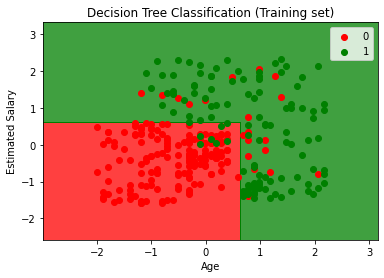

In [19]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<h3>Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


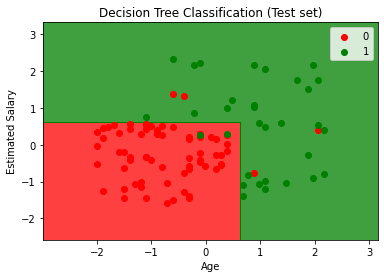

In [20]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()